# From FRED St. Louis

In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, norm, skew
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf
from fredapi import Fred
import requests

In [2]:
FRED_API_KEY = "bc562e27bf7c81c454502e92eba13211"
fred = Fred(api_key=FRED_API_KEY) 

In [3]:
# Period:
apiFrom = '2014-09-01'
apiTo = '2024-10-10'

In [4]:
# nikkei225 = fred.get_series('NIKKEI225',observation_start = apiFrom, observation_end = apiTo)
# nikkei225.head(3)

In [5]:
# nikkei225 = pd.DataFrame(data = nikkei225, columns=["nikkei"])
# nikkei225['Date'] = pd.to_datetime(nikkei225.index, format="%Y-%m-%d")
# nikkei225 = nikkei225.set_index('Date')
# nikkei225.head()

In [99]:
nikkei225 = pd.read_csv("supportdoc/nikkei225.csv") 
nikkei225.set_index('Date', inplace=True)
nikkei225.head(3)

,nikkei
Date,
2014-09-01,15476.60
2014-09-02,15668.60
2014-09-03,15728.35


In [100]:
nikkei225 = px.line(nikkei225, x=nikkei225.index, y=nikkei225['nikkei'], title="Nikkei 225")
nikkei225.show()

## <u>International Merchandise Trade Statistics: Trade Balance: Commodities for Japan</u>

In [8]:
# trdbal = fred.get_series('XTNTVA01JPQ664S',observation_start = apiFrom, observation_end = apiTo)
# trdbal.head()

In [9]:
# trdbal01 = pd.DataFrame(data = trdbal, columns=["commodities"])
# trdbal01['Date'] = pd.to_datetime(trdbal.index, format="%Y-%m-%d")
# trdbal01 = trdbal01.set_index('Date')
# trdbal01.head()

In [96]:
trdbal = pd.read_csv("supportdoc/trade_balance.csv")
trdbal.set_index('Date', inplace=True)
trdbal.head()

,commodities
Date,
2014-07-01,-2.776468e+12
2014-10-01,-2.169755e+12
2015-01-01,-1.055991e+12
2015-04-01,-7.832290e+11
2015-07-01,-8.523330e+11


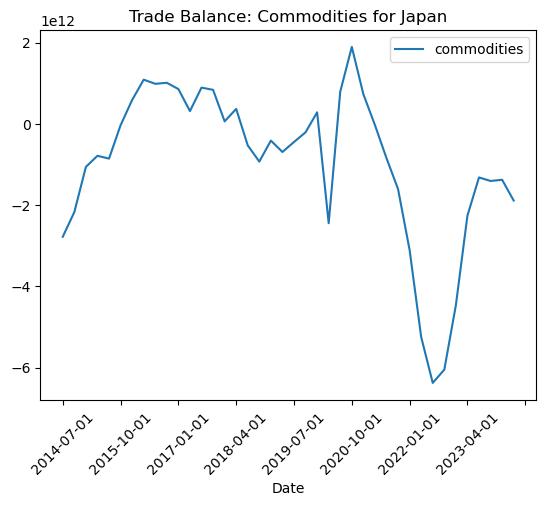

In [98]:
# trdbal = px.line(trdbal, x=trdbal.index, y=trdbal['commodities'], title="Trade Balance: Commodities for Japan")
plot = trdbal.plot(kind='line', title="Trade Balance: Commodities for Japan", rot=45)
# trdbal.show()

## Inflation for Japan

In [14]:
jpinfl = fred.get_series('FPCPITOTLZGJPN',observation_start = apiFrom, observation_end = apiTo)
jpinfl.head()

2014-01-01    2.759227
2015-01-01    0.795280
2016-01-01   -0.127259
2017-01-01    0.484200
2018-01-01    0.989095
dtype: float64

In [15]:
jpinfl.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01', '2023-01-01'],
              dtype='datetime64[ns]', freq=None)

In [76]:
jpinfl.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2014-01-01 to 2023-01-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


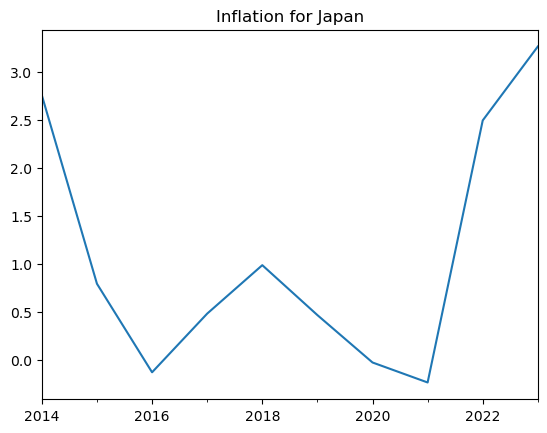

In [17]:
plot = jpinfl.plot(kind='line', title="Inflation for Japan")

## Interest Rates: Long-Term Government Bond Yields: 10-Year for Japan

In [82]:
# jpbond10 = fred.get_series('IRLTLT01JPM156N',observation_start = apiFrom, observation_end = apiTo)
jpbond10 = pd.read_csv("supportdoc/10yrsjpbond.csv") 
jpbond10.set_index('Date', inplace=True)

In [83]:
# jpbond10 = pd.DataFrame(data = jpbond10, columns=["10 Yrs Bond Yields"])
# jpbond10['Date'] = pd.to_datetime(jpbond10.index, format="%Y-%m-%d")
# jpbond10 = jpbond10.set_index('Date')
# jpbond10.head()

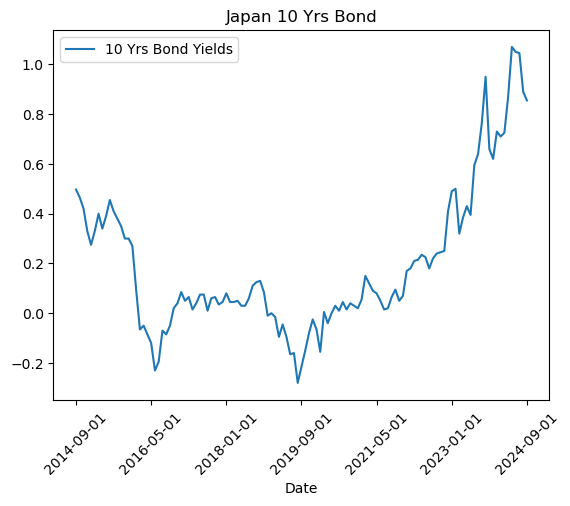

In [85]:
plot = jpbond10.plot(kind='line', title="Japan 10 Yrs Bond", rot=45)

### Interest Rates: Long-Term Government Bond Yields: 10-Year for US

In [87]:
#usbond10 = fred.get_series('IRLTLT01JPM156N',observation_start = apiFrom, observation_end = apiTo)
usbond10 = pd.read_csv("supportdoc/10yrsusbond.csv") 
usbond10.set_index('Date', inplace=True)
usbond10.head()

,10 Yrs Bond Yields
Date,
2014-09-01,0.497
2014-10-01,0.465
2014-11-01,0.420
2014-12-01,0.330
2015-01-01,0.275


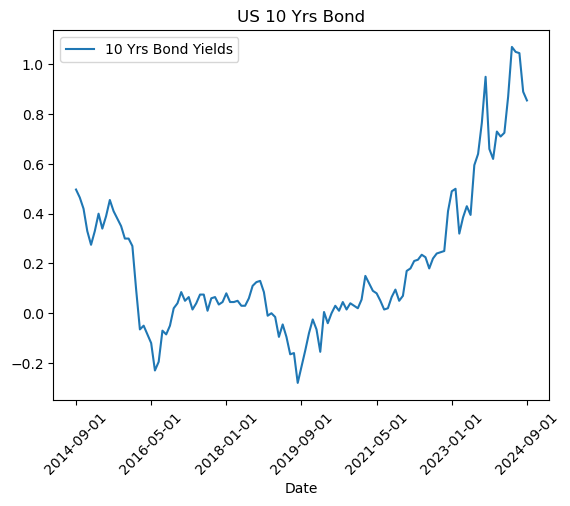

In [89]:
plot = usbond10.plot(kind='line', title="US 10 Yrs Bond", rot=45)

### Interest Rates: 3-Month or 90-Day Rates and Yields: Interbank Rates: Total for Japan

In [91]:
#int90 = fred.get_series('IR3TIB01JPM156N',observation_start = apiFrom, observation_end = apiTo)
int90 = pd.read_csv("supportdoc/Interest_rate_90days.csv")
int90.set_index('Date', inplace=True)
int90.head()

,Interest Rate 90 days
Date,
2014-09-01,0.210
2014-10-01,0.192
2014-11-01,0.182
2014-12-01,0.179
2015-01-01,0.173


In [92]:
#int90 = pd.DataFrame(data = int90, columns=["Interest Rate 90 days"])
#int90['Date'] = pd.to_datetime(int90.index, format="%Y-%m-%d")
#int90 = int90.set_index('Date')
#int90.head()

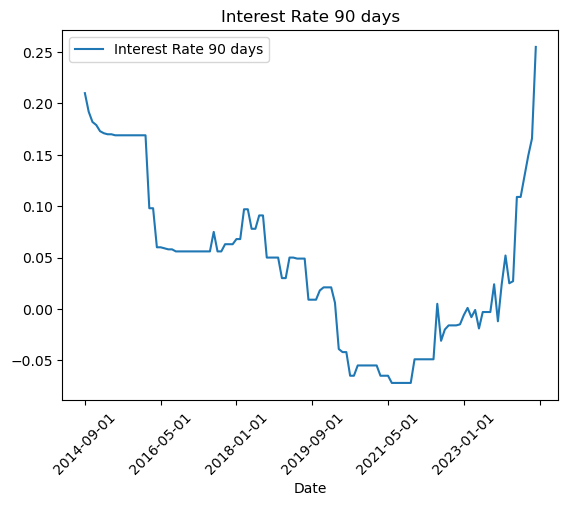

In [93]:
plot = int90.plot(kind='line', title="Interest Rate 90 days", rot=45)

In [26]:
GDP = pd.read_csv("supportdoc/GDP.csv") 
GDP.head()

,Year,Quarter,GDP (Expenditure Approach) (10Billion Yen)
0,2013,Q1,"131,338.80"
1,2013,Q2,"128,463.50"
2,2013,Q3,"132,360.30"
3,2013,Q4,"136,085.50"
4,2014,Q1,"135,163.00"


In [61]:
GDP['Date'] = GDP.apply(lambda x: f"{x['Year']}{x['Quarter']}", axis=1)
GDP.head(3)
GDP.drop(columns={'Year','Quarter'}).set_index('Date')
GDP.rename(columns={'GDP (Expenditure Approach) (10Billion Yen)':'GDP Values'}, inplace=True)
# GDP['GDP Values'] = GDP['GDP Values'].astype(float)
GDP['GDP Values'] = GDP['GDP Values'].apply(lambda x: float(x.split()[0].replace(',', '')))
GDP.head()

,Year,Quarter,GDP Values,Date
0,2013,Q1,131338.8,2013Q1
1,2013,Q2,128463.5,2013Q2
2,2013,Q3,132360.3,2013Q3
3,2013,Q4,136085.5,2013Q4
4,2014,Q1,135163.0,2014Q1


In [72]:
# plot = GDP.plot(kind='line', title="Japan GDP")
fig = make_subplots(rows=1, cols=1)
# fig = px.line(GDP, x=GDP['Date'], y=GDP['GDP Values'], height=500)    # height = 600 is better
fig = go.Figure(data=go.Scatter(x=GDP['Date'], y=GDP['GDP Values'], mode='lines'), layout_yaxis_range=[100000,150000])
fig.update_layout(title='Japan GDP', title_x=0.5)
fig.show()